              precision    recall  f1-score   support

     class 0       0.67      0.89      0.76         9
     class 1       0.80      0.50      0.62         8

    accuracy                           0.71        17
   macro avg       0.73      0.69      0.69        17
weighted avg       0.73      0.71      0.69        17



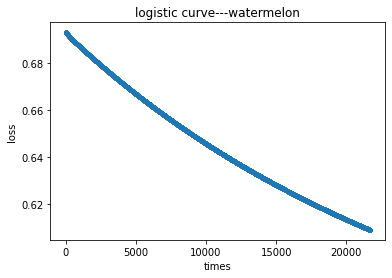

In [1]:
import numpy as np
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import random

class LogisticModel(object):
    def __init__(self, x, y, study_rate = 0.005, min = 0.0001):
        self.x = x                   # 训练数据
        self.y = y                   # 训练标记
        self.study_rate = study_rate # 模型学习率
        self.min = min               # 模型精度
        self.cnt = len(x[0])         # 模型参数个数
        self.LOSS = []               # 损失值
        # self.theta = np.array(       # 模型参数,初始阶段为-1到1之间的随机数
        #     [[random.uniform(-1, 1)] for i in range(self.cnt)])
        self.theta = np.array(       # 模型参数,初始阶段为全0
            [[0.0] for i in range(self.cnt)])
        self.all_sample = 0          # 所有测试样本数量
        self.accuracy = 0            # 模型准确率

    # 对数几率函数
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))


    # 损失函数
    def loss(self, theta):
        # 计算变量乘积
        X = np.dot(self.x, theta)
        loss = 0
        for i in range(len(X)):
            loss += -1 * self.y[i][0] * np.log(self.sigmoid(X[i][0])) - (1 - self.y[i][0]) * np.log(1 - self.sigmoid(X[i][0])) 

        # 记录损失值，方便后续画图
        loss /= len(X)
        self.LOSS.append(loss)
        # print(loss)
        return loss


    # 损失函数梯度计算
    def gradient(self, theta):
        # 计算变量乘积
        X = np.dot(self.x, theta)
        # 一定要注意不要忘记添加sigmoid
        delta = self.sigmoid(X) - self.y
        delta = np.dot(self.x.T, delta) * self.study_rate * (1 / len(X))
        return delta

    # 检测迭代是否结束，其实只需检验减小的值是否都小于临界值
    def check(self, delta):
        for i in delta:
            if abs(i[0]) > self.min:
                return True
        return False


    # 迭代，梯度下降过程
    def fit(self):
        # 先计算初始损失值
        self.loss(self.theta)
        # 根据梯度下降法得到参数的下降值
        Gradient = self.gradient(self.theta)
        # 根据check函数迭代到临界点，结束迭代

        '''
        测试用
        count = 0
        '''
        while(self.check(Gradient)):
            # 梯度下降
            self.theta -= Gradient
            # 更新LOSS
            self.loss(self.theta)
            # print(self.loss(self.theta))
            Gradient = self.gradient(self.theta)


    # 对数几率函数的预测值
    def select(self, n):
        if(n >= 0.5):
            return 1
        else:
            return 0

    # 模型预测
    def predict(self, x, Y):
        # 计算变量乘积
        X = np.dot(x, self.theta)
        self.all_sample = len(X)
        right_sample = 0
        pre = []
        for i in range(self.all_sample):
            y_pre = self.select(self.sigmoid(X[i]))
            pre.append(y_pre)
            if(y_pre == Y[i]):
                right_sample += 1
        # print("预测正确的数量为： %d" %right_sample)
        # self.accuracy = right_sample * 1.0 / self.all_sample
        # print("预测正确率为： %.4f" %self.accuracy)
        return pre
    
    # 模型评估
    def model_report_watermelon(self, pre, Y):
        '''
        调用sklearn库中的分类指标的文本报告
        pre: 预测的标记
        Y  : 真实的标记
        '''
        target_names = ['class 0', 'class 1']
        print(classification_report(Y, pre, target_names=target_names))

    def model_report_iris(self, pre, Y):
        target_names = ['class 0', 'class 1', 'class 2']
        print(classification_report(Y, pre, target_names=target_names))

    # 模型损失值展示
    def model_show(self, mark):
        times = range(len(self.LOSS))
        plt.plot(times, self.LOSS, '.-',label="Train_Loss")
        plt.title('logistic curve---' + mark)
        plt.xlabel('times')
        plt.ylabel('loss')
        plt.show()

if __name__ == '__main__':
    # 西瓜数据集3.0
    # 密度
    density = np.array(
        [0.697, 0.774, 0.634, 0.608, 0.556, 0.403, 0.481, 0.437,
         0.666, 0.243, 0.245, 0.343, 0.639, 0.657, 0.360, 0.593,
         0.719]).reshape(-1, 1)
    # 含糖量
    sugar_rate = np.array(
        [0.460, 0.376, 0.264, 0.318, 0.215, 0.237, 0.149, 0.211,
         0.091, 0.267, 0.057, 0.099, 0.161, 0.198, 0.370, 0.042,
         0.103]).reshape(-1, 1)
    # 偏置
    B = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]).reshape(-1, 1)
    x = np.hstack((density, sugar_rate, B))
    # 训练集标记
    y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape(-1, 1)
    Y = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    logistic = LogisticModel(x, y)
    logistic.fit()
    logistic.model_report_watermelon(logistic.predict(x, Y), Y)
    logistic.model_show("watermelon")

    '''numpy测试代码'''
    # testx = np.array([[1, 1, 1],
    #                   [2, 2, 1]])
    
    # testy = np.array([[1],[0]])
    # theta = np.array([[random.uniform(-1, 1)] for i in range(3)])
    # print(testy[0][0])
    # DOT = np.dot(testx, theta)
    # print(DOT)
    # delta = DOT - testy
    # print(delta)
    # delta *= 2
    # print(delta[0][0])